<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
# Imports
import re
import string
from collections import Counter

import pandas as pd
import numpy as np
import spacy
from spacy.tokenizer import Tokenizer

from bs4 import BeautifulSoup

In [5]:
# Clean the text
def clean_text(text):
    text = text.replace('\n', ' ')                # remove newline
    text = BeautifulSoup(text, "lxml").get_text() # remove html
    text = text.replace('/', ' ')                 # remove forward slashes
    text = re.sub(r'[^a-zA-Z ^0-9]', '', text)    # letters and numbers only
    text = text.lower()                           # lower case
    text = re.sub(r'(x.[0-9])', '', text)         # remove special characters
    return text

yelp['text'] = yelp.apply(lambda x: clean_text(x['text']), axis=1)

In [6]:
# Initialize the tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)
STOP_WORDS = nlp.Defaults.stop_words.union(['xxxx'])

In [8]:
# Tokenizer pipe removing stop words and blank words and lemmatizing
tokens = []

for doc in tokenizer.pipe(yelp['text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)

yelp['tokens'] = tokens

In [10]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,beware fake fake fakewe also own a small busin...,10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fakewe, small, business, ..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,came here for lunch togo service was quick sta...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,ive been to vegas dozens of times and had neve...,2,BdV-cf3LScmb8kZ7iiBcMA,"[ive, vega, dozen, time, step, foot, circus, c..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,we went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[night, close, street, party, actually, group,..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,35 to 4 stars not bad for the price 1299 for ...,5,n9QO4ClYAS7h9fpQwa5bhA,"[35, 4, star, bad, price, 1299, lunch, senior,..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [11]:
# Function to use spacy tokenizer
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and 
                                                     (token.is_punct != True) and
                                                     (token.text != ' ')]

In [13]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# create the transformer (instantiate)
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=STOP_WORDS)

# tokenize and build vocab (fit)
tfidf.fit(yelp['text'])

# transform text (transform)
dtm = tfidf.transform(yelp['text'])

# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())
dtm.head()

,,-PRON-,0,001695,007,01,011802,02,025,03,...,zuma,zumanity,zumba,zuni,zupas,zuzana,zuzu,zyrtec,zzaplon,zzzzzzzzz
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.064166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [15]:
fake_review = ["""This was the best Las Vegas hotel I've ever stayed at!"""]

In [16]:
# Transform fake_review and find reviews
new = tfidf.transform(fake_review)
nn.kneighbors(new.todense())

(array([[0.95731488, 0.96547134, 1.        , 1.04115942, 1.06688489,
         1.11263045, 1.13122561, 1.13366575, 1.13895209, 1.14274701]]),
 array([[ 779, 5270, 6311, 7053, 7832, 9509, 2991, 7476, 7807, 5289]]))

In [17]:
yelp['text'][779]

'we stayed at this hotel because its close to our friends place in toronto  the hotel is just ok its not really good but its not terrible either  the positive is that its affordable and they do give you a free breakfast  service is good too  if there was a better quality hotel in this area we would have stayed there but this was it  if you have to stay in this part of toronto youll be ok staying at the best western roehampton otherwise stay downtown in a nicer hotel'

In [18]:
yelp['text'][5270]

'south point has been one of the more decent hotels that ive stayed in when i was in vegas ive heard a lot of nightmare stories from the more popular hotels around the area but that was never the case when i stayed at south point the one thing that i like about this place is that its not far from the strip but its also not on the strip main reason why i chose to stay here the hotel is also clean and very well maintained as well as the rooms no dirty surprises and no inconveniences my whole stay here was pleasant and enjoyable  i definitely recommend this hotel if you ever stay in vegas'

In [20]:
yelp['text'][7053]

'this is the worst hotel in all of las vegas i live here in vegas and have stayed at quite a few hotels i paid for a week at this hotel and they kicked me out in the middle of the night because of my animals saying i didnt pay an animal fee so i paid the animal fee and they still kicked me out in the middle of the night did not refund my money do not stay here they hate animals they hate animal lovers they will rip you off somehow theres much better hotels in las vegas'

In [63]:
yelp['text'][7832]

'the worst hotel ive stayed at rooms are not cleaned well bathroom covered in mold dirty towels on the floor from previous guests rooms do not even have coffee maker or fridge   hotel is nothing compared to hotels nearby pool is under construction which we we were not notified of until we actually arrived  imagine going to las vegas in june and staying at a hotel that does not have a pool they claim to have partnered with mgm grand to use their room but didnt even have a shuttle so had to walk 40 minutes just to get to a pool  terrible customer service rude staff  do not stay here'

In [64]:
yelp['text'][9509]

'worst place do not waste your time here las vegas has many options dont pick this now'

In [65]:
yelp['text'][2991]

'if you are staying downtown the four queens is right in the middle of all the action that makes it pretty noisy with the fremont street experience going on right outside of the window the hotel is very old and the rooms are dated it does look like the hotel is beginning some sort of renovation program on the plus side the staff does try to take care of their guests also the rooms are very economical and no resort fee is charged also a couple of restaurants in the hotel are pretty good since no one really comes to vegas to spend a lot of time in a hotel room the four queens should be considered for downtown stays'

In [66]:
yelp['text'][7476]

'this hotel gets 3 stars if you are expecting a luxurious hotel this is not the place to stay book a room at the mirage for that they have much nicer rooms for the same price we got the king suite very tiny not good if you will be spending most of your time in your room but if you want a cheaper place to stay and will be out and about while you stay here the nyny would be adequate'

In [67]:
yelp['text'][7807]

'great place to go eat really great authentic mexican food this is my first time eating in this place while staying at las  vegas for 4th of july and i love it'

In [68]:
yelp['text'][5289]

'nice hotel in that its brand new and everything still smelled brand new  extremely clean nice large rooms with full kitchenette  probably the best extended stay hotel ive ever stayed in  all staff were extremely nice  so helpful with everything we needed  would definitely stay here again'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()

In [25]:
# Define the Pipeline, pass a list of tuples
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect),
                 # Classifier
                 ('clf', rfc)
                ])

In [40]:
# Grid search for both vectorizer and classifier
parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)

data = yelp['text'].tolist()
target = yelp['stars'].to_numpy()
grid_search.fit(data, target)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'clf__n_estimators': (5, 10), 'clf__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [41]:
grid_search.best_score_

0.5409

In [42]:
grid_search.predict(fake_review)

array([5])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [45]:
import gensim

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models import LdaMulticore
from gensim.corpora import Dictionary

In [47]:
num_reviews = yelp.shape[0]
texts = []

for i in range (0, num_reviews):
    texts.append(tokenize(yelp['text'][i]))

In [48]:
texts[0]

['beware',
 'fake',
 'fake',
 'fakewe',
 'small',
 'business',
 'los',
 'alamitos',
 'receive',
 'look',
 'like',
 'legitimate',
 'bill',
 '70',
 'account',
 'number',
 'call',
 'phone',
 'number',
 'list',
 '866',
 '2737934',
 'wait',
 'time',
 'hold',
 'say',
 '20',
 'minute',
 'leave',
 'message',
 'live',
 'person',
 'phone',
 'matter',
 'number',
 'select',
 'leave',
 'firm',
 'message',
 'contact',
 'bbb',
 'attorney',
 'company',
 'try',
 'scam',
 'business',
 'illegal']

Learn the vocubalary of the yelp data:

In [49]:
id2word = corpora.Dictionary(texts)

In [50]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=5, no_above=0.95)

Create a bag of words representation of the entire corpus

In [51]:
corpus = [id2word.doc2bow(text) for text in texts]

Your LDA model should be ready for estimation: 

In [52]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [53]:
# Strip out the words
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [54]:
topics = [' '.join(t[0:5]) for t in words]

In [55]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
not  food good service

------ Topic 1 ------
not good place great food

------ Topic 2 ------
not  place good time

------ Topic 3 ------
not good great  food

------ Topic 4 ------
good place not  food

------ Topic 5 ------
good not food place time

------ Topic 6 ------
good place not  food

------ Topic 7 ------
not good  great food

------ Topic 8 ------
good not food place great

------ Topic 9 ------
not time good place come



In [56]:
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [58]:
from gensim.models.coherencemodel import CoherenceModel

# Can take a long time to run.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus, 
                                            limit=10)

In [59]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [60]:
topic_coherence.head()

,coherence_score,num_topics,pass
0,-1.445298,2,0
1,-1.453415,5,0
2,-1.480177,8,0
3,-1.469546,2,1
4,-1.493922,5,1


/Users/JKMacBook/opt/anaconda3/envs/nlp-1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


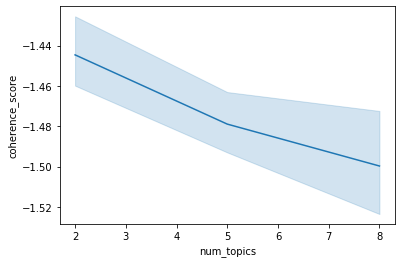

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In general the reviews talk about the food, service and place and whether those are good, not good or great.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [116]:
# Function to use spacy tokenizer
def tokenize(document):    
    doc = nlp(document)   
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and 
                                                     (token.is_punct != True) and
                                                     (token.text != ' ')]

In [117]:
# create the transformer (instantiate)
vect = CountVectorizer(stop_words='english')

# tokenize and build vocab (fit)
vect.fit(data)

# transform text (transform)
dtm = vect.transform(data)

# convert to dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [118]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [119]:
fake_review = ["""This was the best Las Vegas hotel I've ever stayed at!"""]

In [121]:
# Transform fake_review and find reviews
new = vect.transform(fake_review)
nn.kneighbors(new.todense())

(array([[2.23606798, 2.23606798, 2.44948974, 2.64575131, 2.82842712,
         2.82842712, 2.82842712, 2.82842712, 2.82842712, 3.        ]]),
 array([[6204, 6311, 5129, 3543, 2515, 6875, 5983, 5087, 6316, 7352]]))

In [124]:
yelp['text'][5129]

'best place everrrrr'

In [125]:
yelp['text'][3543]

'25 for 2 weeks'

In [126]:
yelp['text'][2515]

'not huge but an interesting collection'

In [127]:
yelp['text'][6875]

'the turn around date is great'

In [128]:
yelp['text'][5983]

'the best fish fry i have ever had nicest people as well'

In [129]:
yelp['text'][5087]

'best place in pittsburgh wish it was bigger'

In [130]:
yelp['text'][6316]

'best swordfish i ever had and surprised because of the location will be back for sure'

In [131]:
yelp['text'][7352]

'perfect stop after a night on the town'

The CountVectorizer seems better for my fake_review than the TF-IDF